In [1]:
from Models import Perceptron
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('linear.csv')
df

,0,1,y
0,8.767747,3.995108,0
1,5.938750,5.387562,0
2,8.605291,-2.652032,1
3,7.488204,5.810372,0
4,7.653939,4.499167,0
...,...,...,...
995,7.211895,7.904023,0
996,8.974970,-3.063078,1
997,7.324660,6.607004,0
998,6.889562,4.775597,0


In [3]:
train_df = df.sample(frac=0.8)      # also shuffles
test_df = df.drop(train_df.index)   # also shuffles


train_df, test_df

(            0         1  y
 164  6.051324 -1.389240  1
 711  9.575624 -1.553734  1
 340  6.081715  5.879360  0
 182  8.784391 -0.735141  1
 879  8.945016  6.407868  0
 ..        ...       ... ..
 98   9.382885 -2.868392  1
 282  8.723364  4.780850  0
 579  6.036649  6.906044  0
 533  6.826990  5.021761  0
 546  8.309521  5.138883  0
 
 [800 rows x 3 columns],
             0         1  y
 6    7.326831  5.901168  0
 8    7.821450 -1.686046  1
 16   8.611481 -1.232345  1
 24   9.697215 -4.256912  1
 31   5.819421  6.349087  0
 ..        ...       ... ..
 981  8.003366 -2.925600  1
 984  6.785866  6.357066  0
 987  8.268783  4.574364  0
 995  7.211895  7.904023  0
 999  9.439694 -2.025759  1
 
 [200 rows x 3 columns])

In [4]:
train_inputs = train_df[['0', '1']].values
train_labels = train_df['y'].values

test_inputs = test_df[['0', '1']].values
test_labels = test_df['y'].values

In [5]:
model = Perceptron(input_size=2)

In [6]:
model.train(train_inputs, train_labels, epochs=10, learning_rate=0.1)

Epoch: 0, Error: 8
Epoch: 1, Error: 0
Epoch: 2, Error: 0
Epoch: 3, Error: 0
Epoch: 4, Error: 0
Epoch: 5, Error: 0
Epoch: 6, Error: 0
Epoch: 7, Error: 0
Epoch: 8, Error: 0
Epoch: 9, Error: 0
[ 0.          0.51178542 -2.06979307]


In [7]:
predicted = model.predict(test_inputs)
print("Error:", np.count_nonzero(predicted - test_labels))

Error: 0


1 [ 0.          0.51178542 -2.06979307]


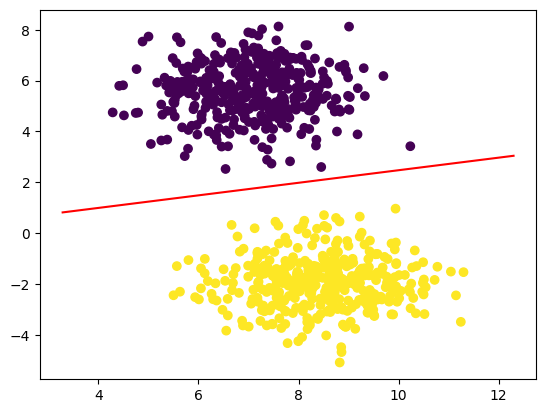

In [8]:
# visualize results
plt.scatter(train_inputs[:,0], train_inputs[:,1], c=train_labels)
x = np.linspace(train_inputs[:,0].min() - 1, train_inputs[:,0].max() + 1, 100)
# print(x)
y = [-model._weights[1] * i + model._weights[0] * model._bias for i in x] / model._weights[2]
print(model._bias, model._weights)
plt.plot(x, y, '-r')
plt.show()